In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import cv2
path='/content/drive/MyDrive/DIP/Assignment03'
mat = scipy.io.loadmat(path+'/BlurKernel.mat')
#mat['h']

In [ ]:
mat['h']

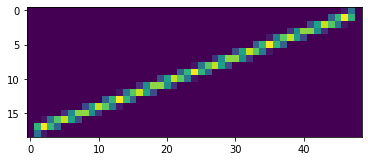

In [ ]:
plt.imshow(mat['h'])

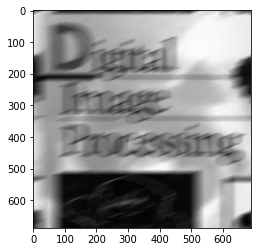

In [ ]:
blur_img=plt.imread(path+'/input/Blurred_LowNoise.png')
plt.imshow(blur_img,cmap='gray')

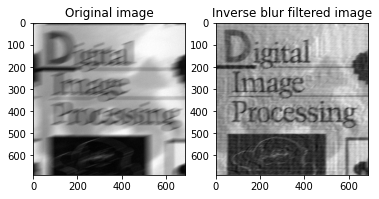

In [ ]:
def th(x,thres):
  return 0 if abs(x)<thres else x
def inverse_blur(g,w):
    # computing the Fourier transforms
    W = np.fft.fft2(w,s=g.shape)
    G = np.fft.fft2(g)

    Wp=1/W
    #thresold<0.1 make 0
    #thresold_fft=np.vectorize(th)
    #Wp=thresold_fft(Wp,0.1)
    
    Wp[np.absolute(W)<0.1]=0

    R = G*Wp
    r = np.real(np.fft.ifft2(R))
    return r

def Q2A():
  f_hat=inverse_blur(blur_img,mat['h'])
  plt.subplot(1,2,2)
  plt.title('Inverse blur filtered image')
  plt.imshow(f_hat,cmap='gray')
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(blur_img,cmap='gray')

Q2A()

**Wiener Filter**

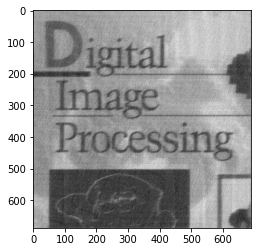

In [ ]:
def wiener_filter(img, kernel, K):
	#kernel /= np.sum(kernel)
	dummy = np.copy(img)
	dummy = np.fft.fft2(dummy)
	kernel = np.fft.fft2(kernel, s = img.shape)
	for i in range(0,img.shape[0]):
		for j in range(0,img.shape[1]):
			kernel[i][j]=np.conj(kernel[i,j])/(np.abs(kernel[i][j])**2+(K*np.sqrt(i**2+j**2)/100000))
	dummy = dummy * kernel
	dummy = np.real(np.fft.ifft2(dummy))
	return dummy

def Q2B():
	oo=wiener_filter(blur_img,mat['h'],1)
	plt.imshow(oo,cmap='gray')
 
Q2B()